In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
#nuskaitykite auto.csv failą į dataframe'ą.

auto = pd.read_csv('auto.csv', sep='|')
auto_mini = auto[['gamintojas', 'modelis','pagaminimo_data','rida', 'price']]
auto_mini.head()

# prie lentelės pridėkite naują stulpelį, kur būtų rida, suapvalinta 15 000 km intervalais.
# apvalinama į aukštesnę pusę:
#  1 km turi tapti 15 000 km
# 5600 km turi tapti 15 000 km
# 15 001 km turi tapti 30 000 km
# 25 800 km turi tapti 30 000 km
# 30 001 km turi tapti 45 000 km

# suraskite visus gamintojus, kurių  modelių vidutinė kaina yra didesnė už vidutinę
# visų automobilių
# kainą. (groupby, reset_index, query)
# Iš jų atrinkite 5-kis brangiausius gamintojus, ir suraskite jų 
# parduodamų modelių vidutinį amžių.

,gamintojas,modelis,pagaminimo_data,rida,price
0,BMW,M5,2005-12,253 000 km,19 500
1,Mitsubishi,Outlander,2006,195 405 km,2 700
2,Seat,Arona,2019-11,129 800 km,13 490
3,Skoda,Octavia Scout,2015-06,183 000 km,14 650
4,Volvo,XC90,2018-08,127 896 km,38 000


In [178]:
# susitvarkau lentele, istrinu tarpus ir nereikalingus trumpinius

def autoKaina(kaina):
    be_tarpu = float(kaina.replace(" ", ""))
    return be_tarpu

auto_mini['price']=auto_mini['price'].apply(autoKaina)
auto_mini

C:\Users\Dovydaiciai\AppData\Local\Temp\ipykernel_3664\4256922657.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto_mini['price']=auto_mini['price'].apply(autoKaina)


,gamintojas,modelis,pagaminimo_data,rida,price
0,BMW,M5,2005-12,253 000 km,19500.0
1,Mitsubishi,Outlander,2006,195 405 km,2700.0
2,Seat,Arona,2019-11,129 800 km,13490.0
3,Skoda,Octavia Scout,2015-06,183 000 km,14650.0
4,Volvo,XC90,2018-08,127 896 km,38000.0
...,...,...,...,...,...
2395,Volvo,S40,2006-06,157 000 km,2250.0
2396,Opel,Astra,2006-10,276 413 km,2250.0
2397,Volkswagen,Golf,2007-06,282 000 km,2250.0
2398,Audi,A4,2006-10,260 000 km,2250.0


In [179]:
def autoRida(km):
    if km == "Nenurodyta": # kitas budas try except
        return -1
    else:
        be_tarpu = float(km[:-3].replace(" ", ""))
        return be_tarpu

auto_mini['rida']=auto_mini['rida'].apply(autoRida)
auto_mini

C:\Users\Dovydaiciai\AppData\Local\Temp\ipykernel_3664\3199057815.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto_mini['rida']=auto_mini['rida'].apply(autoRida)


,gamintojas,modelis,pagaminimo_data,rida,price
0,BMW,M5,2005-12,253000.0,19500.0
1,Mitsubishi,Outlander,2006,195405.0,2700.0
2,Seat,Arona,2019-11,129800.0,13490.0
3,Skoda,Octavia Scout,2015-06,183000.0,14650.0
4,Volvo,XC90,2018-08,127896.0,38000.0
...,...,...,...,...,...
2395,Volvo,S40,2006-06,157000.0,2250.0
2396,Opel,Astra,2006-10,276413.0,2250.0
2397,Volkswagen,Golf,2007-06,282000.0,2250.0
2398,Audi,A4,2006-10,260000.0,2250.0


In [85]:
import math

In [172]:
# prie lentelės pridėkite naują stulpelį, kur būtų rida, suapvalinta 15 000 km intervalais.
# apvalinama į aukštesnę pusę:
#  1 km turi tapti 15 000 km
# 5600 km turi tapti 15 000 km
# 15 001 km turi tapti 30 000 km
# 25 800 km turi tapti 30 000 km
# 30 001 km turi tapti 45 000 km

def suapvalinta(rida):
     naujaRida = math.ceil(rida/15000)*15000 #math.ceil() apvalinimo funkcijos panaudojimas
     return naujaRida

auto_mini['rida_suapvalinta']=auto_mini['rida'].apply(suapvalinta)
auto_mini.head()

C:\Users\Dovydaiciai\AppData\Local\Temp\ipykernel_3664\1638786460.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto_mini['rida_suapvalinta']=auto_mini['rida'].apply(suapvalinta)


,gamintojas,modelis,pagaminimo_data,rida,price,rida_suapvalinta
0,BMW,M5,2005-12,253000.0,19500.0,255000
1,Mitsubishi,Outlander,2006,195405.0,2700.0,210000
2,Seat,Arona,2019-11,129800.0,13490.0,135000
3,Skoda,Octavia Scout,2015-06,183000.0,14650.0,195000
4,Volvo,XC90,2018-08,127896.0,38000.0,135000


In [173]:
# suraskite visus gamintojus, kurių  modelių vidutinė kaina yra didesnė už vidutinę
# visų automobilių
# kainą. (groupby, reset_index, query)
# Iš jų atrinkite 5-kis brangiausius gamintojus, ir suraskite jų 
# parduodamų modelių vidutinį amžių.

vidutine_kaina = auto_mini['price'].mean()

auto_mini = auto_mini.groupby('gamintojas').mean(numeric_only=True).reset_index()
auto_mini.query('price >= @vidutine_kaina').sort_values(by= "price").tail()

,gamintojas,rida,price,rida_suapvalinta
28,Maserati,215000.000000,34950.000000,225000.0
24,Land Rover,133625.000000,40925.000000,138750.0
46,Tesla,104155.777778,45666.666667,110000.0
37,Porsche,103957.400000,61999.900000,111000.0
1,Aston Martin,45000.000000,125000.000000,45000.0


In [174]:
# taip pat atvaizduokite su boxplot'ais šių 5-kių gamintojų parduodamų modelių amžius.

# suskaičiuokite vidutinę kainą kiekvienam ridos intervalui.
# prisiminkite .plot() - atvaizduokite priklausomybę tarp ridos intervalų ir vidutinės kainos tame intervale

# atvaizduokite boxplotu kainų pasiskirstymą nuo kuro rūšies/tipo
# atvaziduokite boxplotu ridos pasiskirstymą nuo kuro rūšies/tipo
# atvaizduokite boxplotas kainos pasiskirstymą nuo ridos (15 000 km intervalais apvalintos)
# atvaizduokite boxplotais ridos pasiskirstymo priklausomybę nuo gamintojo

# pagal jūsų surinktas ir pastebėtas priklausomybes, jei matote:
# M-Benz, 12 metų, benzinas, 210 000 km -
# kokia kaina būtų konkurencinga/logiška/tikėtina? Kodėl?

In [ ]:
# klaida- is not callable reiskia padeti () ten kur ju negalima deti arba turi buti kitokie skliausteliai
# klaida- is not subscritable reiksia ne tokie padeti skliausteliai, daznai lauztiniai turi buti pakeisti i paprastus

In [5]:
auto = pd.read_csv('auto.csv', sep='|')
auto_mini2 = auto[['gamintojas', 'modelis','pagaminimo_data','kuro_tipas','rida', 'price']]
auto_mini2.head()

def autoAmzius(metai):
    vien_metai = 2024-int(metai[:4])
    return vien_metai

auto_mini2['Amzius']=auto_mini2['pagaminimo_data'].apply(autoAmzius)

def autoKaina(kaina):
    be_tarpu = float(kaina.replace(" ", ""))
    return be_tarpu

auto_mini2['price']=auto_mini2['price'].apply(autoKaina)

def autoRida(km):
    if km == "Nenurodyta": # kitas budas try except
        return -1
    else:
        be_tarpu = float(km[:-3].replace(" ", ""))
        return be_tarpu

auto_mini2['rida']=auto_mini2['rida'].apply(autoRida)
auto_mini2

C:\Users\Dovydaiciai\AppData\Local\Temp\ipykernel_10684\1836033746.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto_mini2['Amzius']=auto_mini2['pagaminimo_data'].apply(autoAmzius)
C:\Users\Dovydaiciai\AppData\Local\Temp\ipykernel_10684\1836033746.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto_mini2['price']=auto_mini2['price'].apply(autoKaina)
C:\Users\Dovydaiciai\AppData\Local\Temp\ipykernel_10684\1836033746.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

,gamintojas,modelis,pagaminimo_data,kuro_tipas,rida,price,Amzius
0,BMW,M5,2005-12,Benzinas,253000.0,19500.0,19
1,Mitsubishi,Outlander,2006,Benzinas,195405.0,2700.0,18
2,Seat,Arona,2019-11,Dyzelinas,129800.0,13490.0,5
3,Skoda,Octavia Scout,2015-06,Benzinas,183000.0,14650.0,9
4,Volvo,XC90,2018-08,Dyzelinas,127896.0,38000.0,6
...,...,...,...,...,...,...,...
2395,Volvo,S40,2006-06,Benzinas,157000.0,2250.0,18
2396,Opel,Astra,2006-10,Benzinas,276413.0,2250.0,18
2397,Volkswagen,Golf,2007-06,Benzinas,282000.0,2250.0,17
2398,Audi,A4,2006-10,Dyzelinas,260000.0,2250.0,18


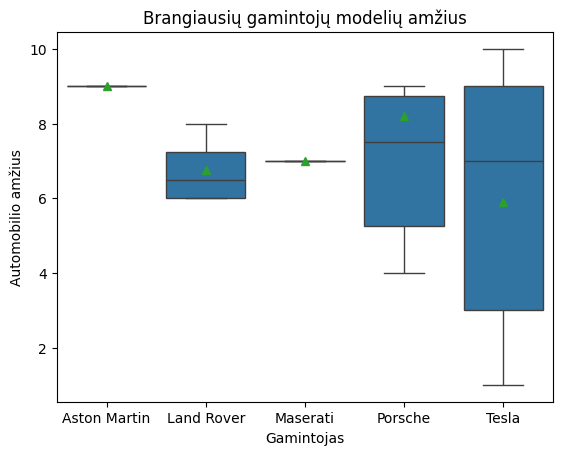

In [12]:
# taip pat atvaizduokite su boxplot'ais šių 5-kių gamintojų parduodamų modelių amžius.

gamintojai = ['Maserati', 'Land Rover', 'Tesla', 'Porsche', 'Aston Martin']

grafikas = sns.boxplot(data=auto_mini2.query('gamintojas in @gamintojai').sort_values(by='gamintojas'), x = 'gamintojas', y= 'Amzius', showmeans=True, showfliers=False)

grafikas.set_title('Brangiausių gamintojų modelių amžius')
grafikas.set_xlabel("Gamintojas")
grafikas.set_ylabel("Automobilio amžius")

plt.show()

In [13]:
# suskaičiuokite vidutinę kainą kiekvienam ridos intervalui. PABAIGTI
# prisiminkite .plot() - atvaizduokite priklausomybę tarp ridos intervalų ir vidutinės kainos tame intervale

def suapvalinta(rida):
     naujaRida = math.ceil(rida/15000)*15000 #math.ceil() apvalinimo funkcijos panaudojimas
     return naujaRida

auto_mini2['rida_suapvalinta']=auto_mini2['rida'].apply(suapvalinta)
auto_mini2.head()

# vid_kaina_intervalui= auto_mini2.groupby('rida_suapvalinta').mean(numeric_only=True).sort_values(by='rida_suapvalinta').reset_index()

vid_kaina_intervalui('price').groupby(by=['rida']).value_counts().unstack().plot(kind='bar')

# nypd_small.query('BORO == "BRONX"').groupby(by=['HR']).value_counts().unstack().plot(kind='bar')

NameError: name 'math' is not defined

C:\Users\Dovydaiciai\AppData\Local\Temp\ipykernel_10684\3720295513.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grafikas.set_xticklabels(grafikas.get_xticklabels(),rotation=90) # paverciam 90 laipsniu kampu sns,boxplot


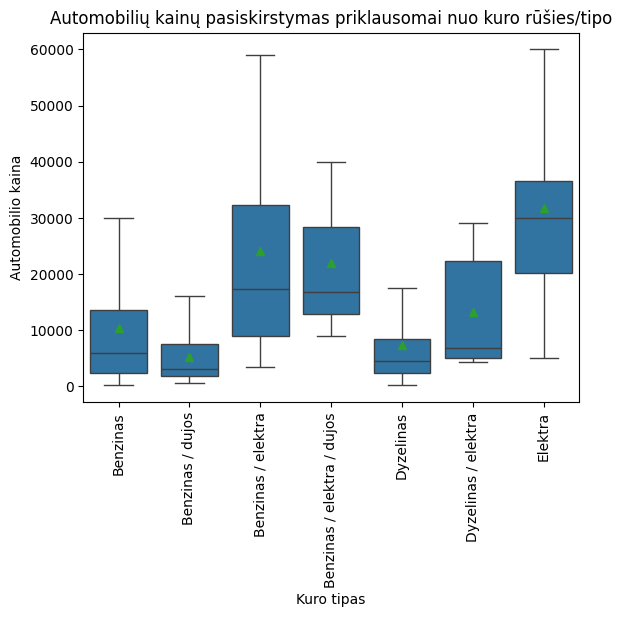

In [14]:
# atvaizduokite boxplotu kainų pasiskirstymą nuo kuro rūšies/tipo

grafikas = sns.boxplot(data=auto_mini2.sort_values(by='kuro_tipas'), x = 'kuro_tipas', y= 'price', showmeans=True, showfliers=False)

grafikas.set_title('Automobilių kainų pasiskirstymas priklausomai nuo kuro rūšies/tipo')
grafikas.set_xlabel("Kuro tipas")
grafikas.set_ylabel("Automobilio kaina")
grafikas.set_xticklabels(grafikas.get_xticklabels(),rotation=90) # paverciam 90 laipsniu kampu sns,boxplot

plt.show()

ValueError: Could not interpret value `rida_suapvalinta` for `x`. An entry with this name does not appear in `data`.

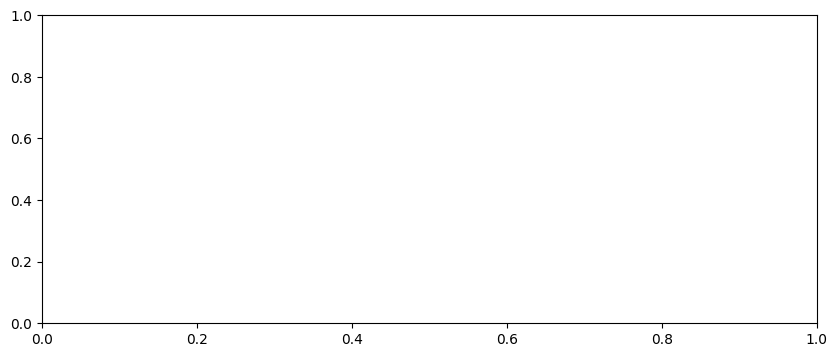

In [15]:
# atvaizduokite boxplotas kainos pasiskirstymą nuo ridos (15 000 km intervalais apvalintos)

fig,grafikas = plt.subplots(figsize=[10,4]) #pirmas sk tai plotis, antras- aukstis

sns.boxplot(data=auto_mini2.sort_values(by='price'), x = 'rida_suapvalinta', y= 'price', showmeans=True, showfliers=False, ax=grafikas) # cia pridedam ax=grafikas, kad viskas suveiktu

grafikas.set_title('Automobilių ridos pasiskirstymas priklausomai nuo ridos')
grafikas.set_xlabel("Rida")
grafikas.set_ylabel("Automobilio kaina")
grafikas.set_xticklabels(grafikas.get_xticklabels(),rotation=90) # paverciam 90 laipsniu kampu sns,boxplot

plt.show()

KeyError: 'rida_suapvalinta'

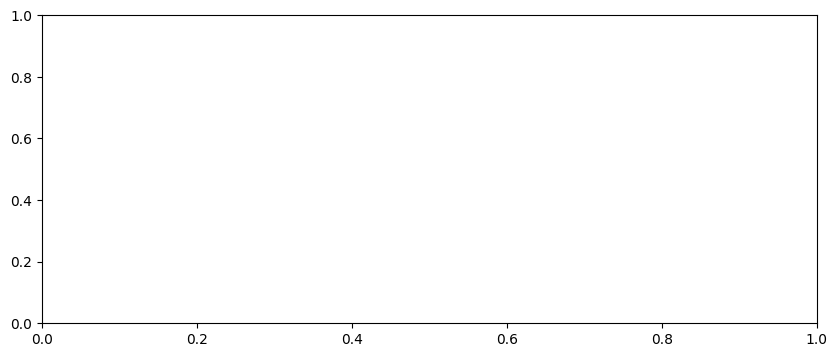

In [16]:
# atvaizduokite boxplotais ridos pasiskirstymo priklausomybę nuo gamintojo

fig,grafikas = plt.subplots(figsize=[10,4])

sns.boxplot(data=auto_mini2.sort_values(by='rida_suapvalinta'), x = 'gamintojas', y= 'rida_suapvalinta', showmeans=True, showfliers=False, ax=grafikas)

grafikas.set_title('Automobilių ridos pasiskirstymas priklausomai nuo gamintojo')
grafikas.set_xlabel("Automobilio gamintojas")
grafikas.set_ylabel("Automobilio rida")
grafikas.set_xticklabels(grafikas.get_xticklabels(),rotation=90) # paverciam 90 laipsniu kampu sns,boxplot

plt.show()

C:\Users\Dovydaiciai\AppData\Local\Temp\ipykernel_10684\4249484725.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grafikas.set_xticklabels(grafikas.get_xticklabels(),rotation=90) # paverciam 90 laipsniu kampu sns,boxplot


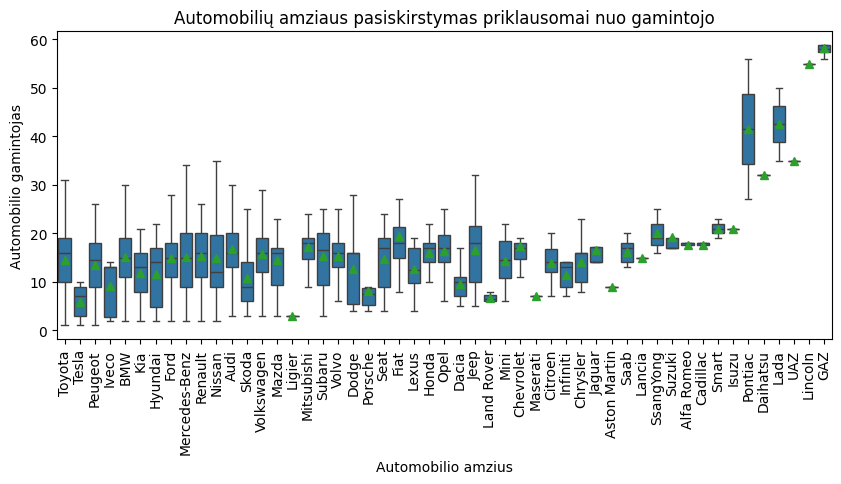

In [17]:
# atvaizduokite boxplotais amziaus pasiskirstymo priklausomybę nuo gamintojo

fig,grafikas = plt.subplots(figsize=[10,4])

sns.boxplot(data=auto_mini2.sort_values('Amzius'), x = 'gamintojas', y= 'Amzius', showmeans=True, showfliers=False, ax=grafikas)

grafikas.set_title('Automobilių amziaus pasiskirstymas priklausomai nuo gamintojo')
grafikas.set_xlabel("Automobilio amzius")
grafikas.set_ylabel("Automobilio gamintojas")
grafikas.set_xticklabels(grafikas.get_xticklabels(),rotation=90) # paverciam 90 laipsniu kampu sns,boxplot

plt.show()

In [18]:
# pagal jūsų surinktas ir pastebėtas priklausomybes, jei matote:
# M-Benz, 12 metų, benzinas, 210 000 km -
# kokia kaina būtų konkurencinga/logiška/tikėtina? Kodėl?

